# Q1
PART A

In [1]:
import re
from pandas import Series, DataFrame
import pandas as pd
%pylab inline


df_gold = pd.read_csv("gold.txt", sep = '\t', header = None, dtype=unicode, names = ['url', 'category'])
df_labels = pd.read_csv("labels.txt",  sep = '\t', header = None, dtype=unicode, names = ['turk', 'url', 'category'])

%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


# Q2
PART B

In [2]:
labels_on_gold = df_gold.merge(df_labels,left_on='url',right_on='url',suffixes=['_gold', '_label'])
labels_unknown = df_labels.merge(df_gold, left_on='url',right_on='url',suffixes=['_label', '_gold'], how = 'left')
labels_unknown = labels_unknown[labels_unknown['category_gold'].isnull()].drop(columns = 'category_gold')
labels_unknown

,turk,url,category_label
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G
5,A2OVKTB7VNY8EW,http://000.cc,G
6,A31Z3E5SLATLML,http://000.cc,P
7,AAVCPZ8WTCFVK,http://000.cc,G
8,AHY98D5P05XIV,http://000.cc,G
9,APTFS1S88K5VC,http://000.cc,G


# Q3

In [3]:
labels_on_gold.loc[labels_on_gold['category_label'] == labels_on_gold['category_gold'], 'Correct'] = 1
labels_on_gold.loc[labels_on_gold['category_label'] != labels_on_gold['category_gold'], 'Correct'] = 0
rater_goodness = labels_on_gold.groupby('turk')['Correct'].agg(['mean', 'count'])
rater_goodness.reset_index()

,turk,mean,count
0,A112DVP1KG4QZU,1.000000,1
1,A1253FXHCZ9CWM,0.517241,29
2,A12CY1Q7XKJJDE,1.000000,1
3,A12RE8G66WTO8B,0.750000,20
4,A12Y1GTGIQDGRA,0.333333,3
5,A13CEW9JGDWGX1,1.000000,1
6,A13OE9GBRJ0S2U,0.750000,4
7,A14IQ4GLNWNPOJ,1.000000,1
8,A153PKAL7OAY36,0.722973,148
9,A1554ZM0CLKSG5,1.000000,1


# Q4

In [4]:
rater_goodness['odds'] = rater_goodness['mean']/(1.001-rater_goodness['mean'])
rater_goodness

,mean,count,odds
turk,,,
A112DVP1KG4QZU,1.000000,1,1000.000000
A1253FXHCZ9CWM,0.517241,29,1.069214
A12CY1Q7XKJJDE,1.000000,1,1000.000000
A12RE8G66WTO8B,0.750000,20,2.988048
A12Y1GTGIQDGRA,0.333333,3,0.499251
A13CEW9JGDWGX1,1.000000,1,1000.000000
A13OE9GBRJ0S2U,0.750000,4,2.988048
A14IQ4GLNWNPOJ,1.000000,1,1000.000000
A153PKAL7OAY36,0.722973,148,2.600369


# Q5

In [5]:
f = rater_goodness[rater_goodness['count']>=20]
f = f.sort_values(by = ['mean'], ascending = False)
f[:10]

,mean,count,odds
turk,,,
A2U0R4X38GUKZE,0.950000,20,18.627451
A22C0PJUBFJTI0,0.916667,36,10.869565
A23YQUBXZPKILZ,0.875000,24,6.944444
ATVALOQVDCMZW,0.854369,103,5.826657
A1HIXWH4OXT8S4,0.825000,40,4.687500
A3220HG1O83HQ4,0.818182,22,4.475385
A32W20KGQXS0LL,0.800000,25,3.980100
A20PWAB7G3HDHU,0.800000,20,3.980100
AJSJVK40F5HM6,0.785714,28,3.649635


# Q6

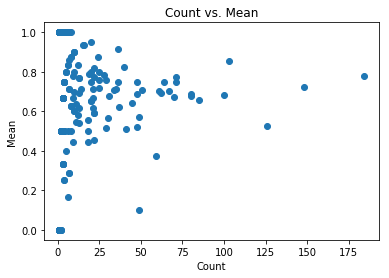

In [6]:
plot(rater_goodness['count'], rater_goodness['mean'], linestyle = 'None', marker = 'o')
xlabel('Count')
ylabel('Mean')
title('Count vs. Mean')
show()

# Q7

In [7]:
top_turks = rater_goodness[rater_goodness['count'] > rater_goodness['count'].quantile(0.75)]

turk_merge = labels_unknown.merge(top_turks, left_on = 'turk', right_on = 'turk',suffixes=['_LU', '_TT'] )
turk_merge= turk_merge.groupby(['url', 'category_label'])['odds'].prod()
turk_merge = DataFrame(turk_merge)

turk_merge = turk_merge.rename(index = str, columns = {'odds':'overall odds'})
turk_merge

overall odds
url                                                category_label              
http://0-101.net                                   G                   2.155963
http://000.cc                                      G                   1.460583
http://0000.jp                                     G                  14.488244
http://000relationships.com                        G                   5.681060
                                                   P                   1.851852
http://000vitamins.com                             G                   3.784982
http://000webhost.com                              G                  11.159502
http://003my.com                                   G                   4.912040
http://007absolutehardcore.com/early_cumshots/i... P                   3.346522
                                                   R                  12.290450
                                                   X                 293.252871
http://007swz.cn                                   G                   1.393883
http://01768.com                                   G                   1.393883
http://0198.cc                                     G                   2.947446
http://01house.cn                                  G                   3.874200
http://01net.com                                   G                   2.463388
http://01yyy.com                                   G                   3.874200
                                                   R                   1.304682
http://020dna.com                                  G                   5.054597
                                                   R                   1.620746
http://020hp.net                                   G                   2.463388
http://020shenghuo.com                             G                   1.393883
http://021cd.com                                   G                   3.378660
http://024haha.cn                                  G                   1.460583
http://028114.com                                  G                   1.854185
http://028town.com                                 G                   3.626269
http://029bus.cn                                   G                   1.097994
                                                   P                   1.330229
http://029zp.com                                   G                   1.047852
http://02et.cn                                     G                   2.581266
...                                                                         ...
http://zoomerang.com                               G                   6.271191
http://zoominfo.com                                G                  50.648819
http://zoosk.com                                   G                   1.818574
                                                   P                   1.620746
http://zoower.com                                  G                   6.796445
http://zooz.vn                                     G                   4.350366
http://zoozle.org                                  G                  33.942585
http://zorkabiz.ru                                 G                   5.054597
http://zouri.jp                                    G                   1.432532
http://zoznam.sk                                   G                   2.652501
                                                   R                   2.988048
http://zqt9.com                                    G                   2.912430
http://zses.com                                    G                   2.784941
http://zshare.net                                  G                   2.423919
http://zshareblog.com                              G                   1.097994
http://zsmhl.com                                   G                   2.419121
                                                   P                   1.620746
http://ztomy.com                                   G               

# Q8

In [8]:
turk_merge_unstack = DataFrame(turk_merge.unstack())
result_75 = turk_merge_unstack.max(axis=1) #max on x axis in stead of default y

result_75 = DataFrame(result_75)#df with one column of the max value
result_75.columns=['odds']
result_75['category_label'] = turk_merge_unstack['overall odds'].idxmax(axis = 1) #gave index max sin 'overall odds',
#usually idxmax gives the index by row, changed it to the cols

result_75

,odds,category_label
url,,
http://0-101.net,2.155963,G
http://000.cc,1.460583,G
http://0000.jp,14.488244,G
http://000relationships.com,5.681060,G
http://000vitamins.com,3.784982,G
http://000webhost.com,11.159502,G
http://003my.com,4.912040,G
http://007absolutehardcore.com/early_cumshots/index.html,293.252871,X
http://007swz.cn,1.393883,G


# Q9

In [9]:
more_top_turks = rater_goodness[rater_goodness['count'] > rater_goodness['count'].quantile(0.25)]


turk_merge1 = labels_unknown.merge(more_top_turks, left_on = 'turk', right_on = 'turk',suffixes=['_LU', '_TT'] )
turk_merge1= turk_merge1.groupby(['url', 'category_label'])['odds'].prod()
turk_merge1 = DataFrame(turk_merge1)

turk_merge1 = turk_merge1.rename(index = str, columns = {'odds':'overall odds'})
turk_merge1


turk_merge_unstack1 = DataFrame(turk_merge1.unstack())
result_25 = turk_merge_unstack1.max(axis=1) #max on x axis in stead of default y

result_25 = DataFrame(result_25)#df with one column of the max value
result_25.columns=['odds']
result_25['category_label'] = turk_merge_unstack1['overall odds'].idxmax(axis = 1) #gave index max sin 'overall odds',
#usually idxmax gives the index by row, changed it to the cols

result_25.columns = ['odds', 'category_label_25']
result_25


df_cross = pd.crosstab(result_75['category_label'], result_25['category_label_25'])
df_cross

category_label_25,G,P,R,X
category_label,,,,
G,8327,574,186,216
P,189,328,47,19
R,21,34,128,25
X,27,6,26,457
